# Data Story of Capstone Project 1 "IBM HR Analytics Employee Attrition and Performance"



In [12]:
#Import some useful modules for upcoming works.
import pandas as pd
import seaborn as sns 
import matplotlib
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline
import scipy.stats as st
import numpy as np


df = pd.read_csv('Desktop/CapstoneProject/Capstone1-HR-Employee-Attrition.csv')

In [13]:
#Get preliminary info of data, df.
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [14]:
#Create a new data set called 'df_yes' by filtering the data set 'df' where Attrition='Yes' 
df_yes=df[df.Attrition == 'Yes']
print(df_yes.head())
df_yes.shape


    Age Attrition BusinessTravel  DailyRate              Department  \
0    41       Yes  Travel_Rarely       1102                   Sales   
2    37       Yes  Travel_Rarely       1373  Research & Development   
14   28       Yes  Travel_Rarely        103  Research & Development   
21   36       Yes  Travel_Rarely       1218                   Sales   
24   34       Yes  Travel_Rarely        699  Research & Development   

    DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                  1          2  Life Sciences              1               1   
2                  2          2          Other              1               4   
14                24          3  Life Sciences              1              19   
21                 9          4  Life Sciences              1              27   
24                 6          1        Medical              1              31   

            ...           RelationshipSatisfaction StandardHours  \
0           ...   

(237, 35)

In [15]:
#Display descriptive statistics of data with attrition.
df_yes.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.000000,237.000000,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,750.362869,10.632911,2.839662,1.0,1010.345992,2.464135,65.573840,2.518987,1.637131,...,2.599156,80.0,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,401.899519,8.452525,1.008244,0.0,580.750572,1.169791,20.099958,0.773405,0.940594,...,1.125437,0.0,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,103.000000,1.000000,1.000000,1.0,1.000000,1.000000,31.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,408.000000,3.000000,2.000000,1.0,514.000000,1.000000,50.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,699.000000,9.000000,3.000000,1.0,1017.000000,3.000000,66.000000,3.000000,1.000000,...,3.000000,80.0,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1092.000000,17.000000,4.000000,1.0,1486.000000,4.000000,84.000000,3.000000,2.000000,...,4.000000,80.0,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1496.000000,29.000000,5.000000,1.0,2055.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


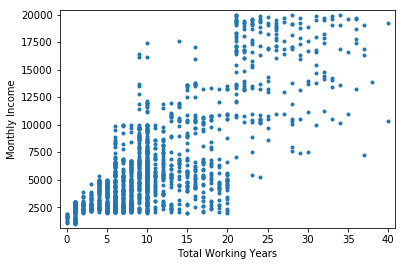

In [55]:
# Make a scatter plot
_= plt.plot(df.TotalWorkingYears, df.MonthlyIncome, marker= '.', linestyle='none')
# Set margins
plt.margins(0.02)
# Label the axes
_=plt.xlabel ('Total Working Years')
_=plt.ylabel ('Monthly Income')

In this scatter plot displayed above:There is not a perfect linear relationship between monthly income and total working years of 
employees who left, but some outliers were detected in high working years with low income. 

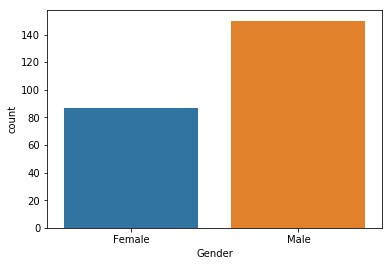

In [16]:
# Count Plot for Gender
sns.countplot(df_yes.Gender)
plt.show()

Employee attrition count in males (around 140) are higher than females.

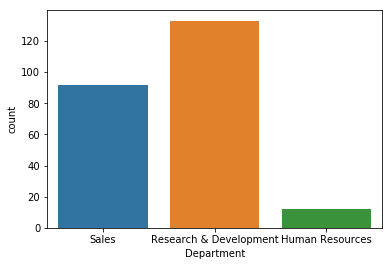

In [17]:
# Countplot of  Department in different categories
sns.countplot(df_yes.Department)
plt.show()

The highest number of attrition(around 140) is from department of Research & Development.

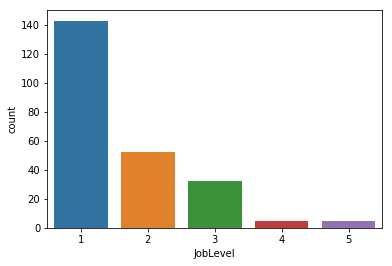

In [18]:
# Countplot for JobLevel
sns.countplot(df_yes.JobLevel)
plt.show()

JobLevel=1 displays highest attrition count around 140.

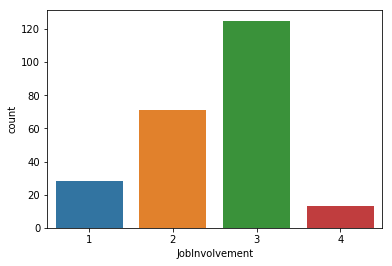

In [19]:
# Countplot for JobInvolvement
sns.countplot(df_yes.JobInvolvement)
plt.show()

JobInvolvement under category 3 displays highest attrition count.

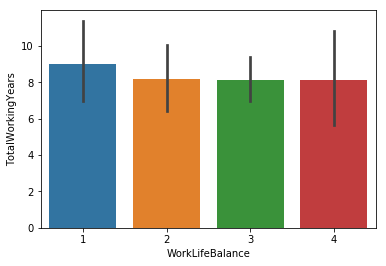

In [20]:
# Histogram of Work life balance Vs Total Working Years
sns.barplot(x = 'WorkLifeBalance', y = 'TotalWorkingYears', data = df_yes)
plt.show()


Employees of WorkLifeBalance=1 having around 9 years of total working years of experience are more likely to leave.

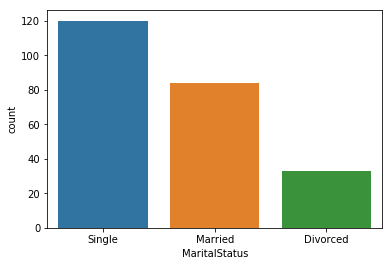

In [21]:
# Countplot for MaritalStatus
sns.countplot(df_yes.MaritalStatus)
plt.show()

Single employees have highest attrition count compare to Married and Divorced ones.

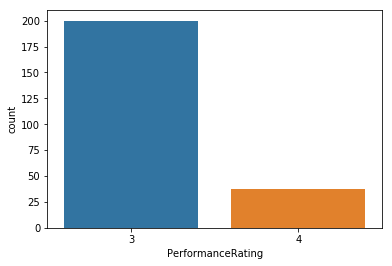

In [22]:
# Countplot for PerformanceRating
sns.countplot(df_yes.PerformanceRating)
plt.show()

The Number of attrition in employees from PerformanceRating 3 is higher than employees in attrition from PerformanceRating 4

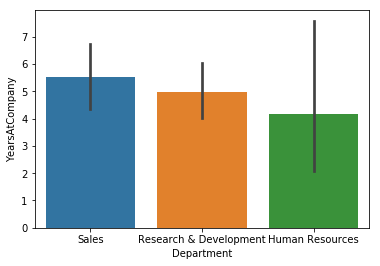

In [23]:
# Histogram of YearsAtCompany Vs Department
sns.barplot(x = 'Department', y = 'YearsAtCompany', data = df_yes)
plt.show()

Employees from Sales department worked long years in the company before they left.

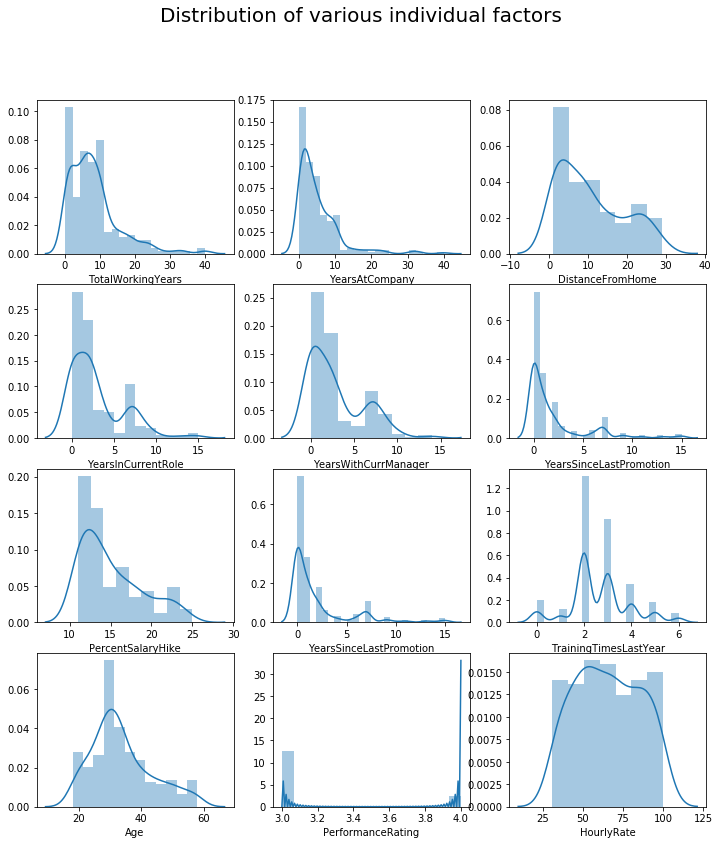

In [24]:
fig,ax = plt.subplots(4,3, figsize=(12,13)) 
# 'ax' has references to all the four axes
plt.suptitle("Distribution of various individual factors", fontsize=20)
sns.distplot(df_yes['TotalWorkingYears'], ax = ax[0,0]) 
sns.distplot(df_yes['YearsAtCompany'], ax = ax[0,1]) 
sns.distplot(df_yes['DistanceFromHome'], ax = ax[0,2]) 
sns.distplot(df_yes['YearsInCurrentRole'], ax = ax[1,0]) 
sns.distplot(df_yes['YearsWithCurrManager'], ax = ax[1,1]) 
sns.distplot(df_yes['YearsSinceLastPromotion'], ax = ax[1,2]) 
sns.distplot(df_yes['PercentSalaryHike'], ax = ax[2,0]) 
sns.distplot(df_yes['YearsSinceLastPromotion'], ax = ax[2,1]) 
sns.distplot(df_yes['TrainingTimesLastYear'], ax = ax[2,2]) 
sns.distplot(df_yes['Age'], ax=ax[3,0])
sns.distplot(df_yes['PerformanceRating'], ax=ax[3,1])
sns.distplot(df_yes['HourlyRate'], ax=ax[3,2])
plt.show()

Figures displayed above represent some features of employees in attrition. The majority of age group of employees left
between 35-40 years old, having 0 to 5 years YearsInCurrent Role.YearsSinceLastPromotion and YearsWithCurrManager are
also coherent with those factors. 

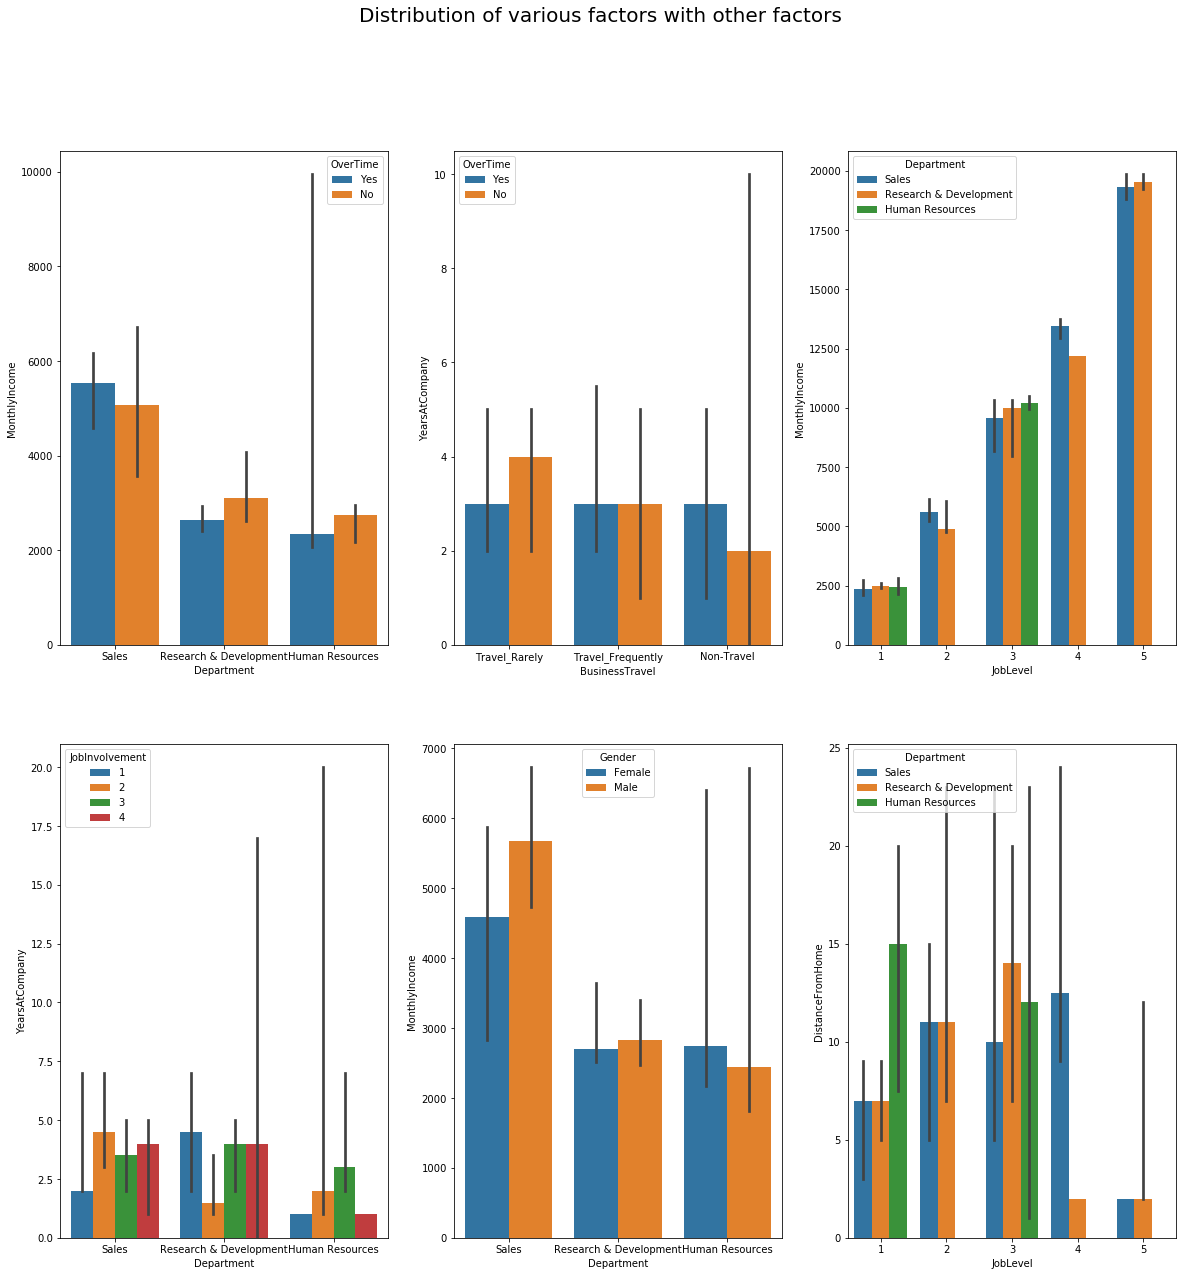

In [40]:
#The goal is to identify some features that link to where Attrition='Yes'
from numpy import median
fig,ax = plt.subplots(2,3, figsize=(20,20))               # 'ax' has references to all the four axes
plt.suptitle("Distribution of various factors with other factors", fontsize=20)
sns.barplot(df_yes['Department'],df_yes['MonthlyIncome'],hue = df_yes['OverTime'], estimator=median, ax = ax[0,0]); 
sns.barplot(df_yes['BusinessTravel'],df_yes['YearsAtCompany'],hue = df['OverTime'], estimator=median, ax = ax[0,1]); 
sns.barplot(df_yes['JobLevel'],df_yes['MonthlyIncome'],hue = df_yes['Department'], estimator=median, ax = ax[0,2]); 
sns.barplot(df_yes['Department'],df_yes['YearsAtCompany'],hue = df_yes['JobInvolvement'],estimator=median, ax = ax[1,0]); 
sns.barplot(df_yes['Department'],df_yes['MonthlyIncome'],hue = df_yes['Gender'], estimator=median, ax = ax[1,1]); 
sns.barplot(df_yes['JobLevel'],df_yes['DistanceFromHome'],hue = df_yes['Department'], estimator=median, ax = ax[1,2]);

plt.show()

#Histograms bar plots from left to right
#1.Employees who had overtime from Sales department having around 6000 monthly income are more likely to leave from other departments
#2.Employees who had no overtime with TravelRarely having around 4 years of working are more likely to leave from employees with travel or no travel status.
#3.Employees who had JobLevel 5 from Research & Development Department having around 20000 monthly income are more likely to leave employees from Sales department having similar categories.
#4.Low job involvements from Sales and Research & Development department are more likely to leave.
#5.Males having around 5500 monthly income from Sales department are more likely to leave from females having 4500 montly income in the same department.   
#6.Job Level 1 in Human Resources having 15 distance from home are more likely to leave. Distance From Home in high job levels can be an issue for people from Sales Department. 

1.04641557699


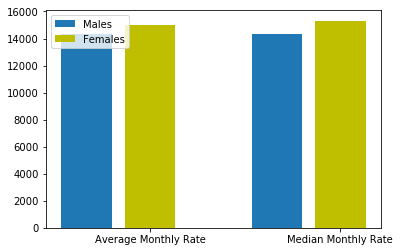

In [34]:
avg_male_rate = np.mean(df_yes.MonthlyRate[df.Gender == 'Male']) 
avg_female_rate = np.mean(df_yes.MonthlyRate[df.Gender == 'Female'])

med_male_rate = np.median(df_yes.MonthlyRate[df.Gender == 'Male']) 
med_female_rate = np.median(df_yes.MonthlyRate[df.Gender == 'Female'])

plt.bar([1,4],[avg_male_rate, med_male_rate]) 
plt.bar([2,5],[avg_female_rate, med_female_rate], color = 'y') 
plt.xticks([2,5],['Average Monthly Rate','Median Monthly Rate']) 
plt.legend(['Males','Females'], loc = 2)

print(avg_female_rate/avg_male_rate) 


Average Monthly Rate for females %4 higher than Males. We know that attrition in males is higher than females, so monthly rate can be an influencial factor for that reason.

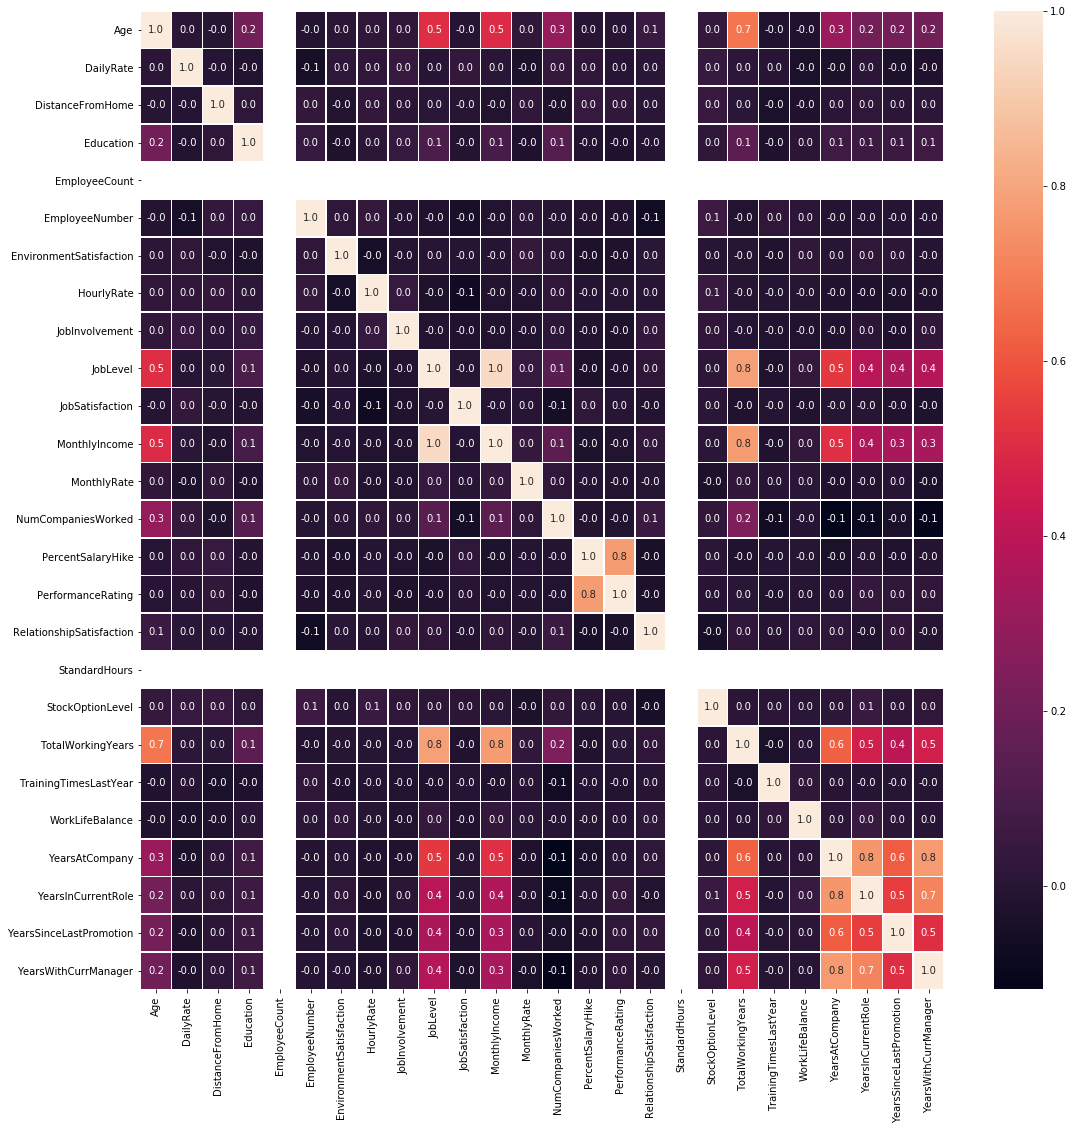

In [26]:
#Plot a correlation map for all numeric variables
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)



#Age highly correlated with TotalWorkingYears(=0.7)
#JobLevel highly correlated with TotalWorkingYears(=0.7)
#JobLevel highly correlated with MonthlyIncome(=1.0)
#MonthlyIncome highly correlated with TotalWorkingYears(=0.8)
#PercentSalaryHike highly correlated with PerformanceRating(=0.8)
#YearsAtCompany highly correlated with YearsInCurrentRole and YearsWithCurrManager (=0.8)
#YearsAtCompany highly correlated with YearsSinceLastPromotion(=0.8)
#YearsCurrentRole highly correlated with YearsWithCurrManager(=0.7)